Testing simple 1D Reynolds ABS

**Same implementation of fatiando scalar**

In [1]:
class Ricker(object):
    r"""
    Ricker Wavelet:
    :math:`A = (1-2 \pi^2 f^2 t^2) e^{-\pi^2 f^2 t^2}`

    * fc        : maximum desired frequency
    * amp       : source strength 
    * delay     : to turn the source causal recommend 1/fc (starting at zero)
    """

    def __init__(self, fc, amp, delay=0.0):
        self.fc = fc
        self.amp = amp
        self.delay = delay

    def __call__(self, t):
        t = t-self.delay
        cx = (np.pi*self.fc*t)**2
        return  self.amp*(1-2*cx)*np.exp(-cx) 

In [2]:
import numpy as np
Nx = 300
dt = 0.003
ds = 10.0
c = 1800.0 #constant
numberiter = 2000
# condition for not having dispersion (alias in space)
# d hale
fmax = c/(10.0*ds)
fpeak = 0.2*fmax
# Koslov alias plane criteria (c must be the min value)
# fmax = c/(2.0*Ds)
# fpeak = 1.0*fmax
ricker = Ricker(fpeak, 1.0, delay=1.0/fpeak)
pad = 2
u = np.zeros([2, Nx+2*pad]) # t and tm1 + 2 buffer
movi  = np.zeros([numberiter-1, Nx+2*pad]) 

**For experiments apply absorbing boundaries just on the left side**

In [3]:
c2 = (c*dt/ds)**2
c = (c*dt/ds)
u[0, Nx//2] = ricker(0.)
for i in xrange(1, numberiter):
    t, tm1 = i % 2, (i + 1) % 2
    tp1 = tm1
    #b = 0 # absorbing applied at edge -1 2nd order space +1/-1
    #u[tp1, b] = u[t, b] + u[t, b+1] -u[tm1, b+1] + c*( u[t, b+1] - u[t, b]  - (u[tm1, b+2] - u[tm1, b+1]))
    #for j in xrange(pad, Nx-pad): # pad (1) exists due +1/-1 need for second order space
    #    u[tp1, j] = 2*u[t, j] - u[tm1, j] + c2*(u[t, j-1]-2*u[t, j]+u[t, j+1])   
    # 4th order space
    b = 0 # absorbing applied at edge -2 4th order space +2/-2
    u[tp1, b] = u[t, b] + u[t, b+1] -u[tm1, b+1] + c*( u[t, b+1] - u[t, b]  - (u[tm1, b+2] - u[tm1, b+1]))
    b = 1 # absorbing applied at edge -1 4th order space +2/-2
    u[tp1, b] = u[t, b] + u[t, b+1] -u[tm1, b+1] + c*( u[t, b+1] - u[t, b]  - (u[tm1, b+2] - u[tm1, b+1]))
    for j in xrange(pad, Nx-pad): # pad (2) exists due +2/-2 need for second order spac
        u[tp1, j] = 2*u[t, j] - u[tm1, j] + c2*(-u[t,j+2] + 16.*u[t,j+1] - 30.*u[t,j] + 16.*u[t,j-1]-u[t,j-2])/12.
    # left abs boundary    
    movi[i-1, :] = u[tp1, :]    
    u[t, Nx//2] += ricker(i*dt)

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


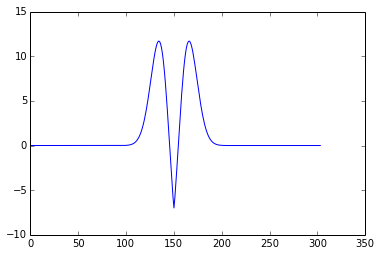

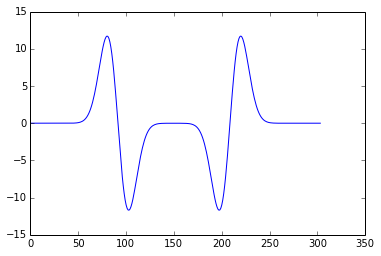

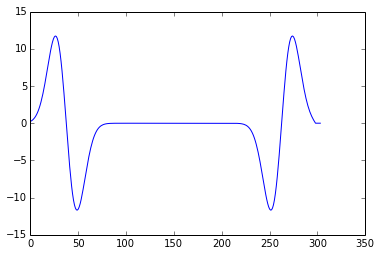

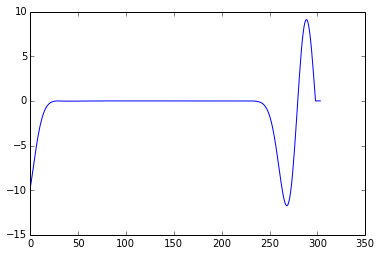

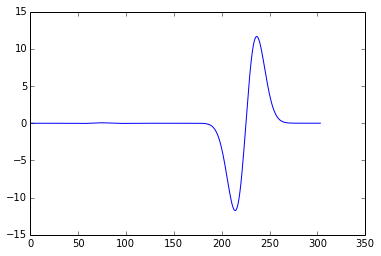

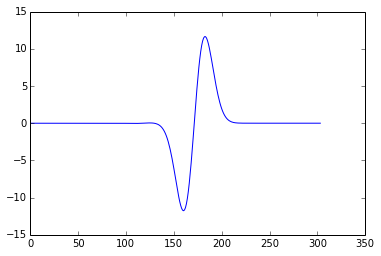

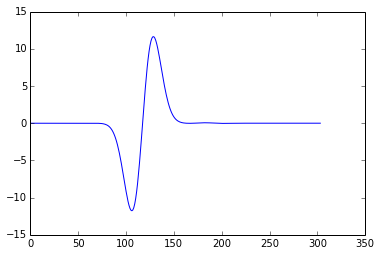

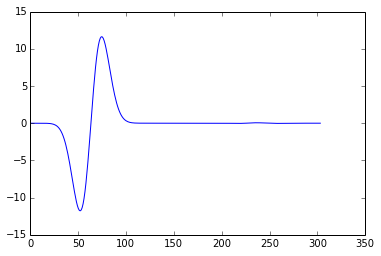

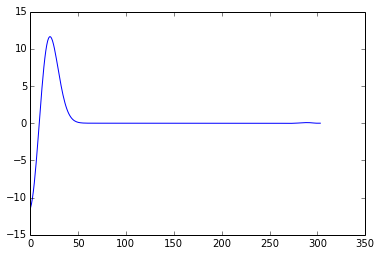

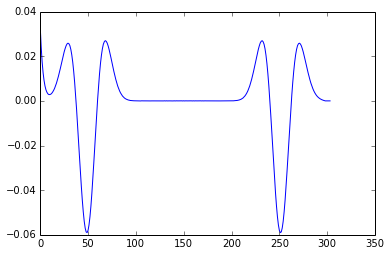

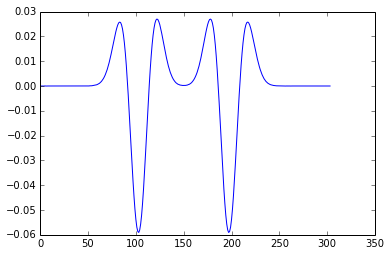

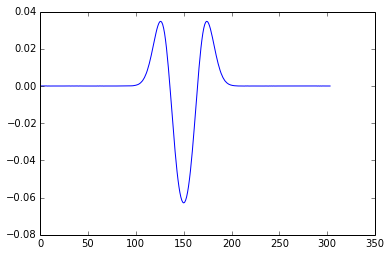

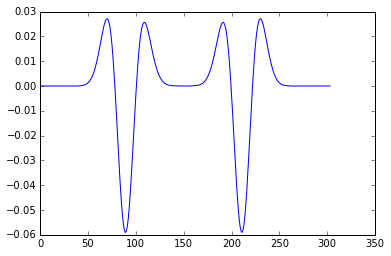

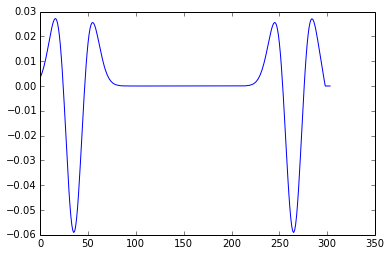

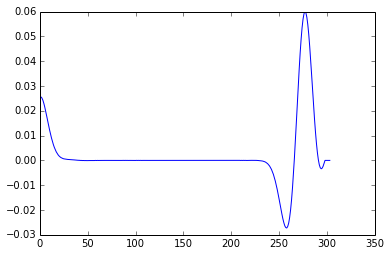

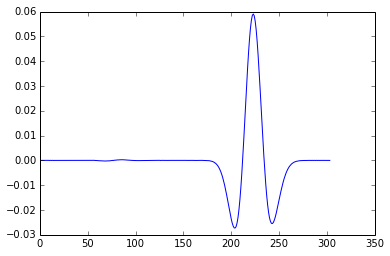

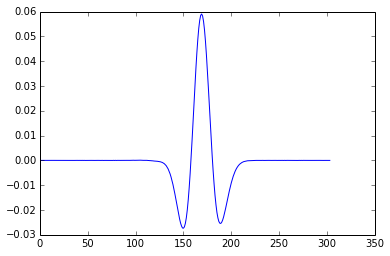

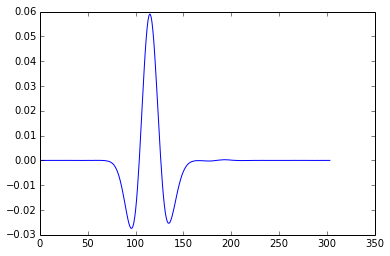

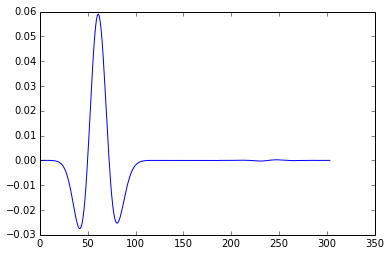

In [5]:
for i in xrange(1,20):
    plot(movi[i*100])
    figure()

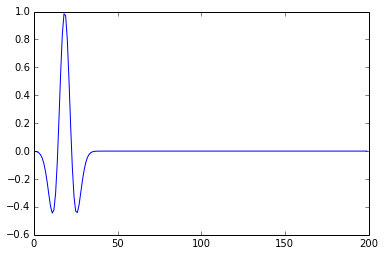

In [6]:
plot(ricker(linspace(0., 3., 200)))